*   Name: Lukman Pambudi
*   Student ID: 20507334062
*   Class: GK2
*   Deadline: February 13, 2022

First, let us install the dependency. We need the control package, just run this command.

In [1]:
!pip install control

     |████████████████████████████████| 357 kB 5.4 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=b9473209ac285923722f1f2340f8783cd4707aab1c005fda6487df512aac9eaf
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


After installing the control package, we can start designing our plant and controller. Here exists a plant with a transfer function such as

$$H_1(s) = \frac{1}{6s - 2},$$

which we need to define in Python. It can be done by running these lines of code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as co

num = 1
den = [0, 6, -2]
H1 = co.tf(num, den)
print(H1)


   1
-------
6 s - 2



Next, we can analyze whether the system is stable or not by running the following code.

[0.33333333]


(array([0.33333333]), array([], dtype=float64))

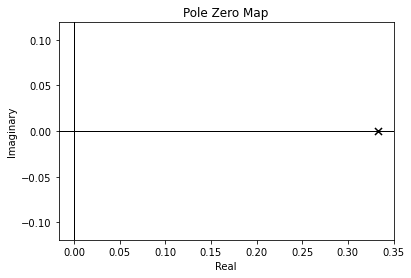

In [3]:
poles = co.pole(H1)
print(poles)
co.pzmap(H1)

It appears that there is a pole which lies in the Right-Half Hemisphere. It indicates that the system is not stable. Let exponential function such as

$$f(t) = e^{at},$$
where $a$ is the pole.


1.   It is stable if $f(t) = 0$ for time $t = ∞$;
2.   It is unstable if $f(t) = ∞$ for time $t = ∞$;

Now, let see the poles.



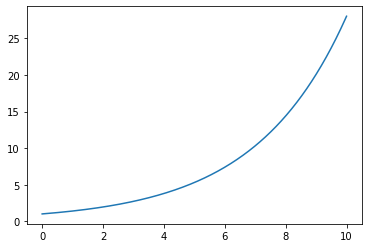

In [4]:
t = np.linspace(0, 10, 1000)
f1 = np.exp(poles[0]*t)
plt.plot(t, f1)

In [5]:
f2 = np.exp(poles[1]*t)
plt.plot(t, f2)

IndexError: ignored

It is apparent that the system is unstable, **please elaborate** 
the system is unstable because, in the graph above it only has 1 pole. The pole has a value of 0.33333333. it can be seen in the graph that the pole is to the right of 0, or the pole point is in the Right-Half Hemisphere. then if the plotted value is 0.33333333. does not approach the value 0, then the transfer function above is not stable

Let us plot the step response of the system.

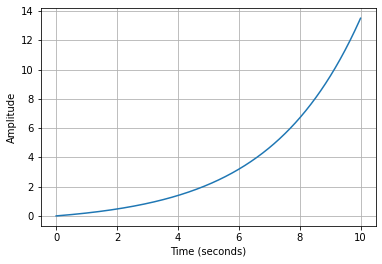

In [6]:
t1, y1 = co.step_response(H1, t)

plt.plot(t1, y1)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()

In order to make a better response, the controller is necessary.
Here we use PID controller which can be denoted in Laplace form as

$$H_2(s) = K_p + \frac{K_i}{s} + K_ds.$$



In [7]:
Kp = 90
Ki = 60
Kd = 30

H2 = co.tf([Kd, Kp, Ki], [1, 0])
print(H2)


30 s^2 + 90 s + 60
------------------
        s



The parameters of controller have been defined, where we have

$$H_2(s) = \frac{30s^2 + 90s + 60}{s}.$$

Let see for series, parallel, and feedback combination of those two.


30 s^2 + 90 s + 60
------------------
   6 s^2 - 2 s

[0.33333333 0.        ]


(array([0.33333333, 0.        ]), array([-2., -1.]))

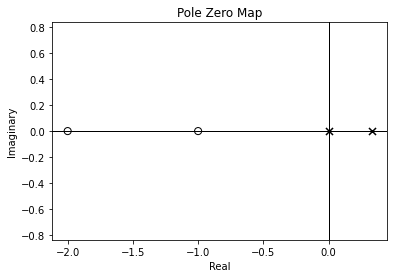

In [8]:
OL = co.series(H1, H2)
print(OL)
print(co.pole(OL))
co.pzmap(OL)

The series combination can be seen as open-loop system where
$$O_L(s) = H_1(s)H_2(s).$$

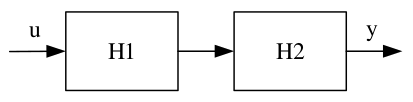


180 s^3 + 480 s^2 + 181 s - 120
-------------------------------
          6 s^2 - 2 s

[0.33333333 0.        ]


(array([0.33333333, 0.        ]),
 array([-1.99521685, -1.00418856,  0.33273874]))

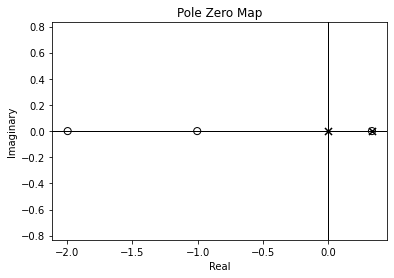

In [9]:
PL = co.parallel(H1, H2)
print(PL)
print(co.pole(PL))
co.pzmap(PL)

Parallel combination, we add both $H_1$ and $H_2$ such as
$$P_L(s) = H_1(s)+H_2(s).$$

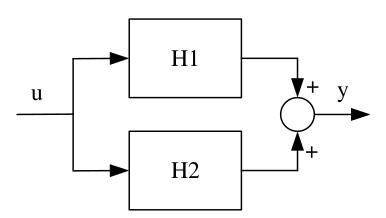


        s
------------------
36 s^2 + 88 s + 60

[-1.22222222+0.41573971j -1.22222222-0.41573971j]


(array([-1.22222222+0.41573971j, -1.22222222-0.41573971j]), array([0.]))

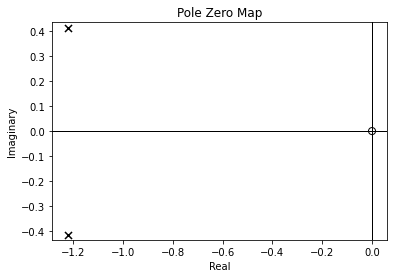

In [10]:
CL = co.feedback(H1, H2)
print(CL)
print(co.pole(CL))
co.pzmap(CL)

Lastly, the feedback combination yields a new transfer function of a closed-loop system such as
$$C_L = \frac{H_1(s)}{1+H_1(s)H_2(s)}.$$
 
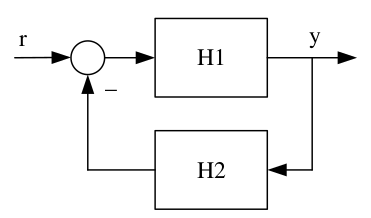

Now, you can analyze if the systems are stable or unstable by looking for the poles.



1.   The series combination is unstable, since pole is 0.33333333 which means it is on the right or Right-Half Hemisphere
2.   The parallel combination is unstable, since pole is 0.33333333 which means it is on the right or Right-Half Hemisphere
3.   The feedback combination is stable, since the pole value is on the left or called the Left-Half Hemisphere

Next, please plot the step responses.



In [ ]:
# Write your code here to plot the step response for series combination.



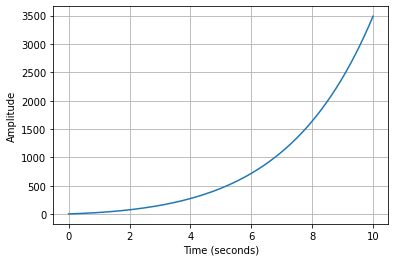

In [12]:
t1, y1 = co.step_response(OL, t)

plt.plot(t1, y1)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()

In [13]:
# Write your code here to plot the step response for parallel combination.
t1, y1 = co.step_response(PL, t)

plt.plot(t1, y1)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()

ValueError: ignored

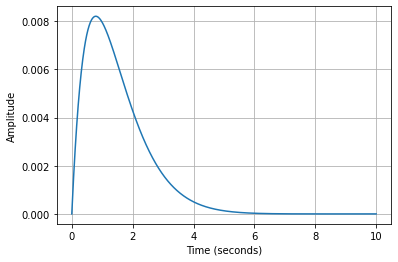

In [14]:
# Write your code here to plot the step response for feedback combination.
t1, y1 = co.step_response(CL, t)

plt.plot(t1, y1)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()